### Import Dependencies

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

### Import csvs


In [2]:
# Import DataFrames
flights_table = pd.read_csv('Resources/DB_Flights_Table.csv')
delayed_table = pd.read_csv('Resources/DB_Delayed_Flights_Table.csv')
airline_table = pd.read_csv('Resources/Airlines.csv')
airports_table = pd.read_csv('Resources/DB_Airport_Codes.csv',index_col=0)

### Create Dataframes for visuals

In [3]:
# add relevant columns to delayed table for merge

cols_from_flights_table = ['Origin_Airport','Destination_Airport','Operating_Airline']

delayed_table[cols_from_flights_table] = flights_table[cols_from_flights_table]

In [4]:
# Merge to create a visuals_df
visuals_df = delayed_table.merge(airline_table, left_on='Operating_Airline', right_on='Code').copy()
visuals_df = visuals_df.merge(airports_table, left_on='Origin_Airport', right_on='Airport_Code')
visuals_df = visuals_df.merge(airports_table, left_on='Destination_Airport', right_on='Airport_Code')

In [5]:
# convert minutes columns to datetime format and add int minutes column

delay_in_minutes_cols = ['Arrival_Delayed_Minutes',
        'Departure_Delayed_Minutes',
        'Carrier_Delay_Minutes',
        'Weather_Delay_Minutes',
        'NAS_Delay_Minutes',
        'Security_Delay_Minutes',
        'Late_Aircraft_Delay_Minutes']

for col in delay_in_minutes_cols:
        visuals_df[col] =pd.to_timedelta(visuals_df[col])
        visuals_df[f'{col}(int)'] = visuals_df[col].dt.total_seconds() / 60


In [6]:
# Remove unnecessary columns

visuals_df = visuals_df[['Unnamed: 0', 'Airline_Flight_Number', 'Flight_Date',
       'Scheduled_Arrival_Time', 'Scheduled_Departure_Time',
       'Code',
       'Description', 'Airport_Code_x', 'Airport_City_x', 'Airport_State_x',
       'Airport_Code_y', 'Airport_City_y', 'Airport_State_y',
       'Arrival_Delayed_Minutes(int)', 'Departure_Delayed_Minutes(int)',
       'Carrier_Delay_Minutes(int)', 'Weather_Delay_Minutes(int)',
       'NAS_Delay_Minutes(int)', 'Security_Delay_Minutes(int)',
       'Late_Aircraft_Delay_Minutes(int)']]

In [7]:
# Rename Columns

visuals_df = visuals_df.rename(columns={
    'Unnamed: 0': 'Flight_ID', 
    'Code':'Operating_Airline_Code',
    'Description': 'Airline_Name',
    'Airport_Code_x':'Origin_Airport_Code',
    'Airport_City_x':'Origin_Airport_City',
    'Airport_State_x':'Origin_Airport_State',
    'Airport_Code_y':'Dest_Airport_Code',
    'Airport_City_y':'Dest_Airport_City',
    'Airport_State_y':'Dest_Airport_State',
    'Arrival_Delayed_Minutes(int)':'Arrival_Delayed_Minutes',
    'Departure_Delayed_Minutes(int)':'Departure_Delayed_Minutes',
    'Carrier_Delay_Minutes(int)':'Carrier_Delay_Minutes',
    'Weather_Delay_Minutes(int)':'Weather_Delay_Minutes',
    'NAS_Delay_Minutes(int)':'NAS_Delay_Minutes',
    'Security_Delay_Minutes(int)':'Security_Delay_Minutes',
    'Late_Aircraft_Delay_Minutes(int)':'Late_Aircraft_Delay_Minutes'
})

In [8]:

new_col_order = [
    'Flight_ID',
    'Airline_Flight_Number',
    'Flight_Date',
    'Operating_Airline_Code',
    'Airline_Name',
    'Scheduled_Departure_Time',
    'Origin_Airport_Code',
    'Origin_Airport_City',
    'Origin_Airport_State',
    'Scheduled_Arrival_Time',
    'Dest_Airport_Code',
    'Dest_Airport_City',
    'Dest_Airport_State',
    'Arrival_Delayed_Minutes',
    'Departure_Delayed_Minutes',
    'Carrier_Delay_Minutes',
    'Weather_Delay_Minutes',
    'NAS_Delay_Minutes',
    'Security_Delay_Minutes',
    'Late_Aircraft_Delay_Minutes'
]

visuals_df = visuals_df[new_col_order]

# Below


In [9]:
visuals_df

,Flight_ID,Airline_Flight_Number,Flight_Date,Operating_Airline_Code,Airline_Name,Scheduled_Departure_Time,Origin_Airport_Code,Origin_Airport_City,Origin_Airport_State,Scheduled_Arrival_Time,Dest_Airport_Code,Dest_Airport_City,Dest_Airport_State,Arrival_Delayed_Minutes,Departure_Delayed_Minutes,Carrier_Delay_Minutes,Weather_Delay_Minutes,NAS_Delay_Minutes,Security_Delay_Minutes,Late_Aircraft_Delay_Minutes
0,7,1586,2022-01-06,DL,Delta Air Lines Inc.,10:00,FLL,Fort Lauderdale,FL,14:33,LGA,New York,NY,2.0,18.0,0.0,0.0,0.0,0.0,0.0
1,1509,754,2022-01-07,DL,Delta Air Lines Inc.,11:59,FLL,Fort Lauderdale,FL,13:32,LGA,New York,NY,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2,3211,2761,2022-01-07,DL,Delta Air Lines Inc.,17:55,FLL,Fort Lauderdale,FL,18:44,LGA,New York,NY,0.0,20.0,0.0,0.0,0.0,0.0,0.0
3,4371,1364,2022-01-15,DL,Delta Air Lines Inc.,08:30,FLL,Fort Lauderdale,FL,10:06,LGA,New York,NY,6.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5138,2600,2022-01-15,DL,Delta Air Lines Inc.,15:15,FLL,Fort Lauderdale,FL,16:35,LGA,New York,NY,10.0,11.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912247,3252002,1249,2022-06-08,UA,United Air Lines Inc.,18:55,GUM,Guam,TT,23:30,SPN,Saipan,TT,6.0,12.0,0.0,0.0,0.0,0.0,0.0
1912248,3254697,1118,2022-06-09,UA,United Air Lines Inc.,08:35,GUM,Guam,TT,09:35,SPN,Saipan,TT,65.0,72.0,9.0,0.0,0.0,0.0,56.0
1912249,3257168,2500,2022-06-15,UA,United Air Lines Inc.,17:00,GUM,Guam,TT,18:30,SPN,Saipan,TT,10.0,7.0,0.0,0.0,0.0,0.0,0.0
1912250,3260885,3041,2022-06-16,UA,United Air Lines Inc.,09:00,GUM,Guam,TT,09:55,SPN,Saipan,TT,7.0,0.0,0.0,0.0,0.0,0.0,0.0


### Gather Data

In [10]:
# delayed flights by origin
highest_delay_origin_airport = visuals_df.loc[visuals_df['Departure_Delayed_Minutes']>0].groupby('Origin_Airport_Code').count()['Flight_ID'].sort_values(ascending=False)
# delayed flights by destination
highest_delay_dest_airport = visuals_df.loc[visuals_df['Arrival_Delayed_Minutes']>0].groupby('Dest_Airport_Code').count()['Flight_ID'].sort_values(ascending=False)


In [11]:
airports_table['Dep_Delay_Count']=airports_table['Airport_Code'].apply(lambda x: highest_delay_origin_airport[x] if x in highest_delay_origin_airport else None)
airports_table['Arr_Delay_Count']=airports_table['Airport_Code'].apply(lambda x: highest_delay_dest_airport[x] if x in highest_delay_dest_airport else None)

In [12]:
airports_table.sort_values(by='Dep_Delay_Count',ascending=False)

,Airport_Code,Airport_City,Airport_State,Dep_Delay_Count,Arr_Delay_Count
1,ATL,Atlanta,GA,66296.0,64200.0
37,DFW,Dallas/Fort Worth,TX,64611.0,60710.0
41,ORD,Chicago,IL,63194.0,60881.0
63,DEN,Denver,CO,58106.0,55964.0
24,CLT,Charlotte,NC,52550.0,49657.0
...,...,...,...,...,...
370,ACK,Nantucket,MA,NaN,NaN
371,GST,Gustavus,AK,NaN,NaN
372,HYA,Hyannis,MA,NaN,NaN
373,MVY,Martha's Vineyard,MA,NaN,NaN


In [13]:
# % of flights Delayed
delaytotal_percentage = len(delayed_table)/len(flights_table)

delaytotal_percentage

0.4688825148014451

In [14]:
# Highest delayed airlines
highest_delayed_airlines = pd.DataFrame(visuals_df.groupby('Airline_Name').count()['Flight_ID'].sort_values(ascending=False))
highest_delayed_airlines

,Flight_ID
Airline_Name,
Southwest Airlines Co.,395052
American Airlines Inc.,272708
Delta Air Lines Inc.,207084
SkyWest Airlines Inc.,179036
United Air Lines Inc.,140496
Republic Airlines,111957
Endeavor Air Inc.,82166
Envoy Air,65470
JetBlue Airways,64860


In [15]:
# highest percent cause of delay

In [16]:
delay_cat_cols = [
    'Carrier_Delay_Minutes',
    'Weather_Delay_Minutes',
    'NAS_Delay_Minutes',
    'Security_Delay_Minutes',
    'Late_Aircraft_Delay_Minutes'
    ]

In [17]:
# Find total minutes of delay across all categories
total_delay_minutes= visuals_df[delay_cat_cols].sum().sum()
total_delay_minutes

58149475.0

In [18]:
# Create a Delays by category DF
total_delay_category= pd.DataFrame(visuals_df[delay_cat_cols].sum())

In [19]:
# Determine the percentage of total delays each category makes up

delay_cat_percents = [(total_delay_category[0][x])/total_delay_minutes for x in total_delay_category.index]
total_delay_category['%Cause'] = delay_cat_percents

In [20]:
total_delay_category

,0,%Cause
Carrier_Delay_Minutes,23222386.0,0.399357
Weather_Delay_Minutes,3167658.0,0.054474
NAS_Delay_Minutes,9849302.0,0.169379
Security_Delay_Minutes,116112.0,0.001997
Late_Aircraft_Delay_Minutes,21794017.0,0.374793


In [21]:
display(delaytotal_percentage)
display(highest_delayed_airlines)
display(airports_table)
display(total_delay_minutes)
display(total_delay_category)

0.4688825148014451

,Flight_ID
Airline_Name,
Southwest Airlines Co.,395052
American Airlines Inc.,272708
Delta Air Lines Inc.,207084
SkyWest Airlines Inc.,179036
United Air Lines Inc.,140496
Republic Airlines,111957
Endeavor Air Inc.,82166
Envoy Air,65470
JetBlue Airways,64860


,Airport_Code,Airport_City,Airport_State,Dep_Delay_Count,Arr_Delay_Count
0,FLL,Fort Lauderdale,FL,19623.0,19221.0
1,ATL,Atlanta,GA,66296.0,64200.0
2,JAN,Jackson/Vicksburg,MS,1793.0,1694.0
3,RIC,Richmond,VA,5422.0,5139.0
4,MSP,Minneapolis,MN,24312.0,23843.0
...,...,...,...,...,...
370,ACK,Nantucket,MA,NaN,NaN
371,GST,Gustavus,AK,NaN,NaN
372,HYA,Hyannis,MA,NaN,NaN
373,MVY,Martha's Vineyard,MA,NaN,NaN


58149475.0

,0,%Cause
Carrier_Delay_Minutes,23222386.0,0.399357
Weather_Delay_Minutes,3167658.0,0.054474
NAS_Delay_Minutes,9849302.0,0.169379
Security_Delay_Minutes,116112.0,0.001997
Late_Aircraft_Delay_Minutes,21794017.0,0.374793


In [54]:
airports_table.sort_values(by='Arr_Delay_Count',ascending=False).head(10)

,Airport_Code,Airport_City,Airport_State,Dep_Delay_Count,Arr_Delay_Count
1,ATL,Atlanta,GA,66296.0,64200.0
41,ORD,Chicago,IL,63194.0,60881.0
37,DFW,Dallas/Fort Worth,TX,64611.0,60710.0
63,DEN,Denver,CO,58106.0,55964.0
24,CLT,Charlotte,NC,52550.0,49657.0
36,LAX,Los Angeles,CA,41134.0,39839.0
45,PHX,Phoenix,AZ,41853.0,39596.0
8,LGA,New York,NY,43435.0,39464.0
31,LAS,Las Vegas,NV,37274.0,35894.0
33,DCA,Washington,DC,35166.0,33012.0


Text(0.5, 1.0, 'Highest Delayed Airlines')

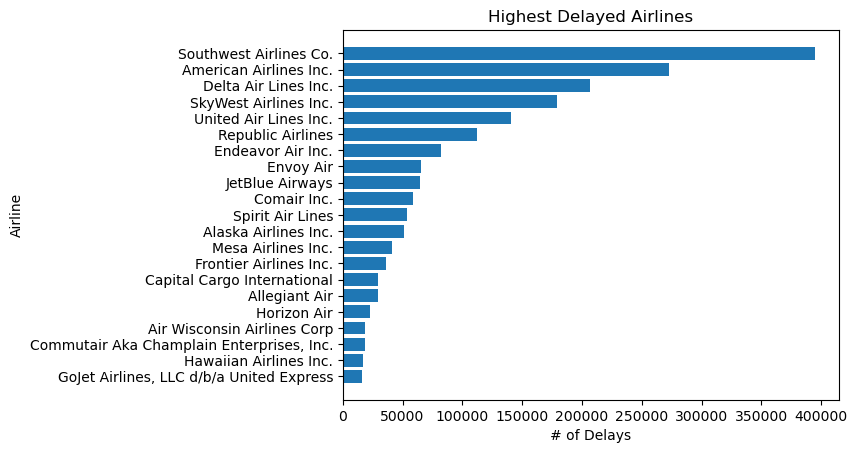

In [104]:

fig,ax = plt.subplots()

ax.barh(highest_delayed_airlines.index,highest_delayed_airlines['Flight_ID'])
fig.gca().invert_yaxis()
ax.set_ylabel('Airline')
ax.set_xlabel('# of Delays')
ax.set_title("Highest Delayed Airlines")

In [105]:
total_delay_category.index

Index(['Carrier_Delay_Minutes', 'Weather_Delay_Minutes', 'NAS_Delay_Minutes',
       'Security_Delay_Minutes', 'Late_Aircraft_Delay_Minutes'],
      dtype='object')

Text(0.5, 1.0, 'Delay Category Percentage')

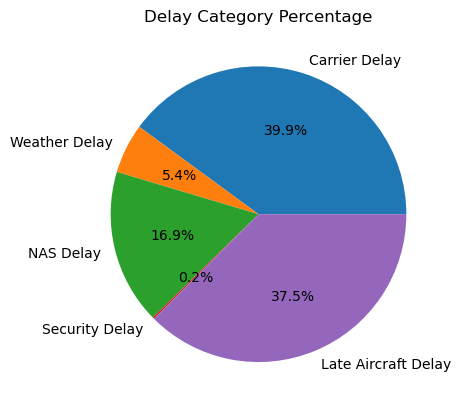

In [106]:
fig, ax = plt.subplots()
ax.pie(total_delay_category['%Cause'], labels=['Carrier Delay','Weather Delay','NAS Delay','Security Delay','Late Aircraft Delay'],autopct='%.1f%%')
ax.set_title("Delay Category Percentage")


In [70]:
airport_viz_dep = pd.DataFrame()
airport_viz_arr = pd.DataFrame()
airport_viz_arr[['Arr_Delay_Count','Airport_Code']] = airports_table[['Arr_Delay_Count','Airport_Code']].sort_values(by='Arr_Delay_Count',ascending=False).head(10)
airport_viz_dep[['Dep_Delay_Count','Airport_Code']] = airports_table[['Dep_Delay_Count','Airport_Code']].sort_values(by='Dep_Delay_Count',ascending=False).head(10)

Text(0.5, 1.0, 'Departure Delays by Airport')

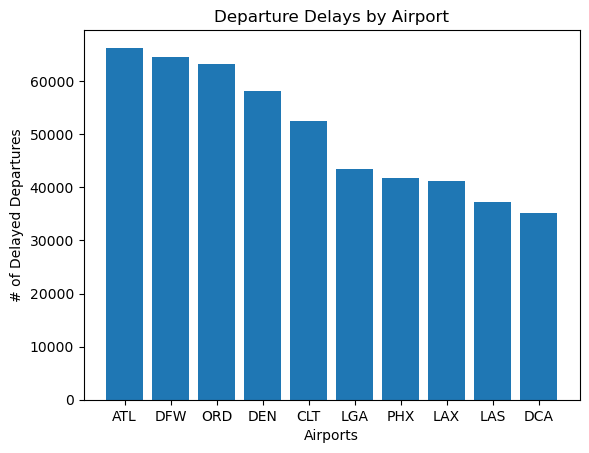

In [102]:
fig, ax = plt.subplots()
ax.bar(airport_viz_dep['Airport_Code'],airport_viz_dep['Dep_Delay_Count'])
ax.set_xlabel('Airports')
ax.set_ylabel('# of Delayed Departures')
ax.set_title("Departure Delays by Airport")

Text(0.5, 1.0, 'Arrival Delays by Airport')

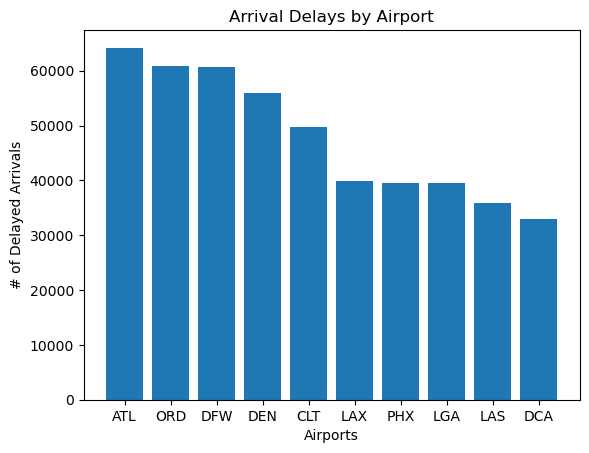

In [103]:
fig, ax = plt.subplots()
ax.bar(airport_viz_arr['Airport_Code'],airport_viz_arr['Arr_Delay_Count'])
ax.set_xlabel('Airports')
ax.set_ylabel('# of Delayed Arrivals')
ax.set_title("Arrival Delays by Airport")